In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uplaoded = files.upload()

Saving cancer.csv to cancer.csv


In [3]:
df = pd.read_csv('cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df = df.drop('Unnamed: 32',axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


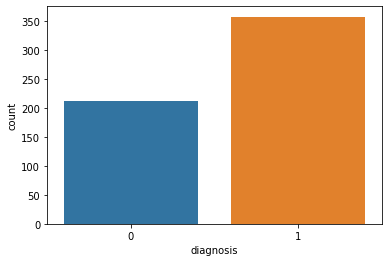

In [9]:
sns.countplot(x='diagnosis',data=df)

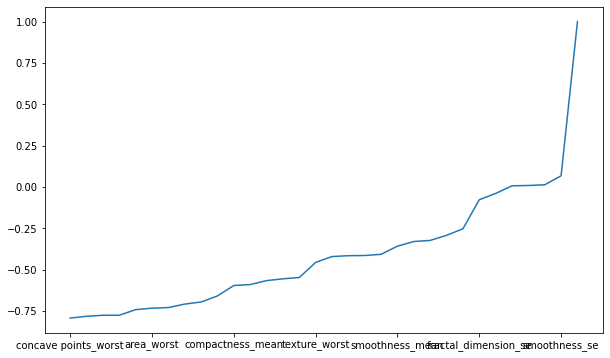

In [10]:
plt.figure(figsize=(10,6))
df.corr()['diagnosis'].sort_values().plot()

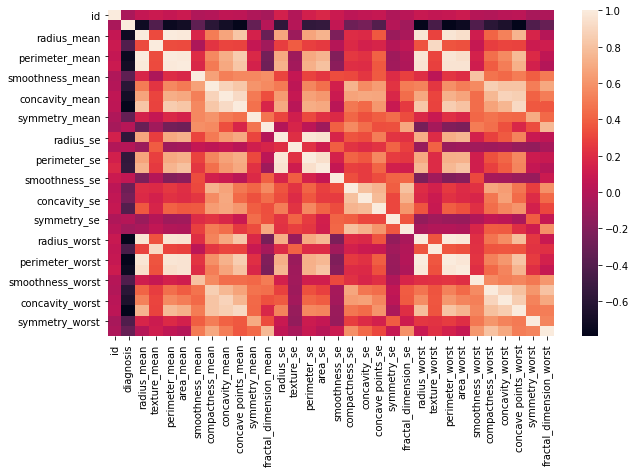

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [12]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test) # we do not do fit for data leakage

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [21]:
X_train.shape

(426, 31)

In [22]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6575 - val_loss: 0.6349
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6141 - val_loss: 0.5941
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5766 - val_loss: 0.5567
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5431 - val_loss: 0.5139
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5019 - val_loss: 0.4649
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4507 - val_loss: 0.4162
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3995 - val_loss: 0.3758
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3561 - val_loss: 0.3363
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3353 - val_loss: 0.3064
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3015 - val_loss: 0.2780
Epoch 11

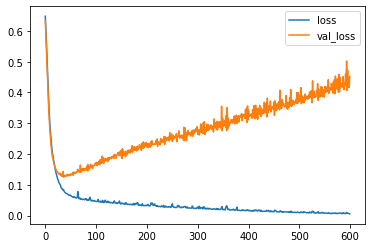

In [25]:
loss = pd.DataFrame(model.history.history)
loss.plot()  # overfitting after a certain period of time bcz validation loss is increasing.

In [26]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping  # to decrease validation loss

In [28]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25) # we want to minimize our validation loss

In [29]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6825 - val_loss: 0.6588
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6489 - val_loss: 0.6254
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6151 - val_loss: 0.5929
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5749 - val_loss: 0.5554
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5469 - val_loss: 0.5107
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4898 - val_loss: 0.4612
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4316 - val_loss: 0.4137
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4007 - val_loss: 0.3705
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3584 - val_loss: 0.3326
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3145 - val_loss: 0.2985
Epoch 11

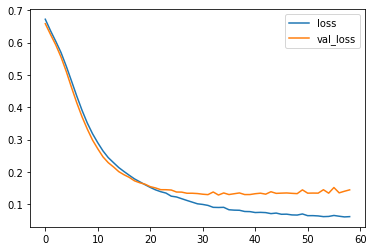

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [31]:
from tensorflow.keras.layers import Dropout # to avoid overfitting

In [32]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) # half the neurons during each batch in the epoch will turned off, so weights and biases wont be updated. ideal value is 0.2-0.5 but never 1.
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Binary Classification

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7141 - val_loss: 0.6783
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6874 - val_loss: 0.6629
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6698 - val_loss: 0.6452
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6531 - val_loss: 0.6254
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6224 - val_loss: 0.5999
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6079 - val_loss: 0.5650
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5921 - val_loss: 0.5316
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5681 - val_loss: 0.4964
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5344 - val_loss: 0.4619
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4978 - val_loss: 0.4296
Epoch 11

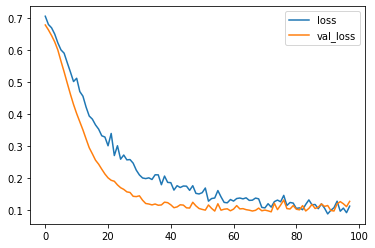

In [34]:
latest_model_loss = pd.DataFrame(model.history.history)
latest_model_loss.plot()

In [36]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [39]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 5 83]]
